In [1]:
import pandas as pd
import db
import inspect
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

In [2]:
data_original=pd.read_sql(sql="select * from _51jobs where monthly_salary>0", con=db.get_conn())

In [3]:
data_original.shape

(139688, 146)

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']

In [5]:
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
data.shape

(139675, 146)

In [7]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [8]:
def get_sub_stats(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    count=[]
    for feature in features:
        salary_mean.append(data[data[feature]==1].monthly_salary.mean())
        salary_median.append(data[data[feature]==1].monthly_salary.median())
        count.append(data[data[feature]==1].shape[0])
    sub_data=pd.DataFrame()
    sub_data[prefix]=[f.replace(prefix,'') for f in features]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data.style.format({"percentage":"{:.2%}"})
    return sub_data

In [9]:
data_pl=get_sub_stats(data,'pl_')

In [10]:
data_pl.style.format({"percentage":"{:.2%}"})

,pl_,salary_mean,salary_median,head_count,percentage
6,haskell,2.43718,2.25,13,0.01%
19,scala,2.066,1.8625,1444,0.79%
18,rust,1.93439,1.725,158,0.09%
16,python,1.80442,1.5,14962,8.21%
12,matlab,1.80004,1.6,2695,1.48%
5,groovy,1.79699,1.65,83,0.05%
4,go,1.78756,1.5,12645,6.94%
14,perl,1.75493,1.5,1383,0.76%
25,r,1.73009,1.5,648,0.36%
11,lua,1.64639,1.5,2330,1.28%


In [11]:
data_pl=data_pl[['pl_','percentage']].sort_values(by='percentage', ascending=False)
#data_pl.style.format({"percentage":"{:.2%}"})
data_pl.style.format({"percentage":"{:.2%}"})

,pl_,percentage
7,java,29.28%
2,cpp,16.08%
8,javascript,15.09%
1,c_sharp,10.95%
16,python,8.21%
4,go,6.94%
15,php,5.19%
12,matlab,1.48%
11,lua,1.28%
20,swift,0.83%


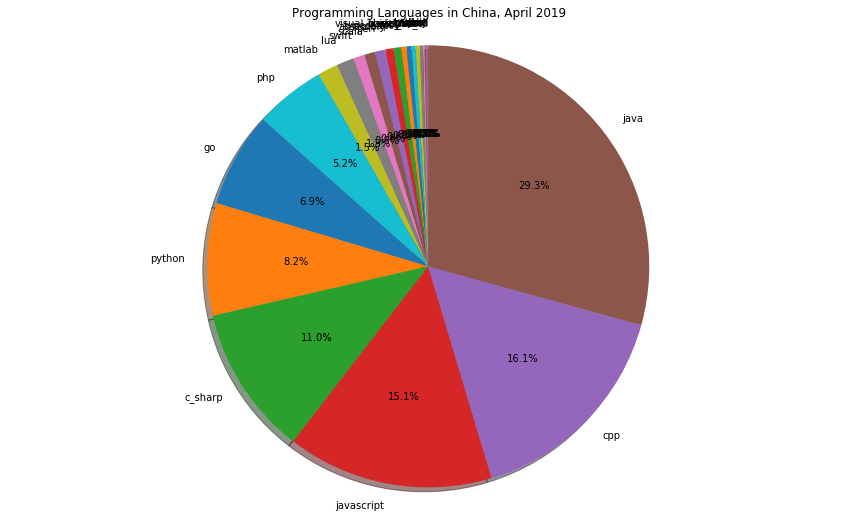

In [12]:
data_pl=data_pl.sort_values(by='percentage')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data_pl['pl_']
sizes = data_pl['percentage']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(15, 9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Programming Languages in China, April 2019")
plt.show()

## Word Cloud

In [14]:
from wordcloud import WordCloud

In [15]:
wc=WordCloud()

In [18]:
wc_dict = {}

In [19]:
for index, row in data_pl.iterrows():
    wc_dict[row['pl_']]=row['percentage']

In [22]:
wc=wc.generate_from_frequencies(wc_dict)

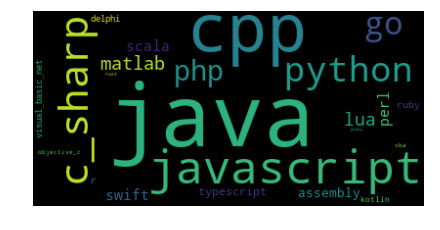

In [26]:
plt.figure(figsize=(7,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()